In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('labeled_data.csv')

# Display the first few rows of the dataset
df.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


# Dataset Exploration

In [ ]:
# Check for missing values
df.isnull().sum()

,0
Unnamed: 0,0
count,0
hate_speech,0
offensive_language,0
neither,0
class,0
tweet,0


In [ ]:
# Check the data types of each column
df.dtypes

,0
Unnamed: 0,int64
count,int64
hate_speech,int64
offensive_language,int64
neither,int64
class,int64
tweet,object


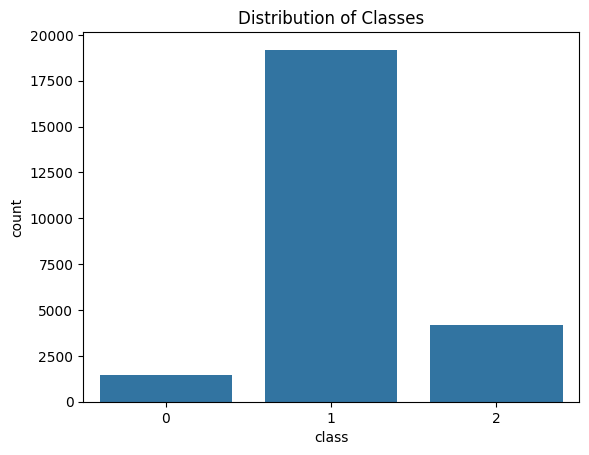

In [ ]:
# Class distribution
sns.countplot(x='class', data=df)
plt.title('Distribution of Classes')
plt.show()

In [ ]:
# Summary statistics of the dataset
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [ ]:
# Unique values in 'class' column
df['class'].value_counts()

,count
class,
1,19190
2,4163
0,1430


In [ ]:
# Display a few tweets
for i in range(5):
    print(f"Tweet {i+1}: {df['tweet'].iloc[i]}")

Tweet 1: !!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
Tweet 2: !!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
Tweet 3: !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
Tweet 4: !!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
Tweet 5: !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


#Text Preprocessing

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

# Function to clean the text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.split()
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stopwords
    text = ' '.join(text)
    return text

# Apply the preprocessing to the tweet column
df['cleaned_tweet'] = df['tweet'].apply(preprocess_text)

# Display the cleaned tweets
df[['tweet', 'cleaned_tweet']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweet,cleaned_tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolovely woman shouldnt complain cleani...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew boy dats coldtyga dwn bad cuffin dat ...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt sbabylife ever fuck b...
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt cganderson vivabased look like tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikaroberts shit hear might true might f...


In [ ]:
# Save the cleaned dataset
from google.colab import files
df.to_csv('cleaned_hate_speech_dataset.csv', index=False)
files.download('cleaned_hate_speech_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Feature Extraction (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Transform the 'cleaned_tweet' column
X = tfidf.fit_transform(df['cleaned_tweet']).toarray()

# Target variable
y = df['class']

#Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model Preparation and Training

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Initialize the models
models = {
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB(),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

Training Random Forest...
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.51      0.13      0.21       290
           1       0.92      0.96      0.94      3832
           2       0.81      0.87      0.84       835

    accuracy                           0.89      4957
   macro avg       0.75      0.65      0.66      4957
weighted avg       0.88      0.89      0.88      4957

Confusion Matrix for Random Forest:


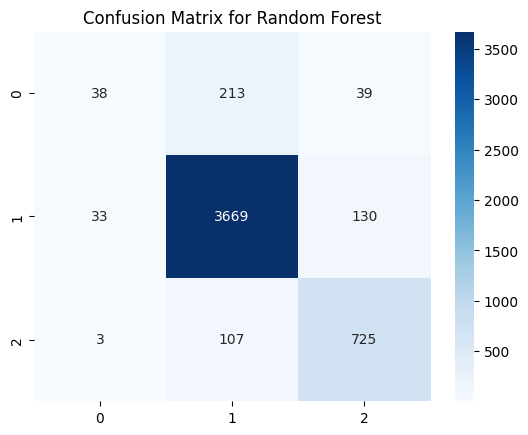

Accuracy of Random Forest: 0.8941

Training Naive Bayes...
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.60      0.01      0.02       290
           1       0.83      0.99      0.91      3832
           2       0.88      0.42      0.57       835

    accuracy                           0.84      4957
   macro avg       0.77      0.47      0.50      4957
weighted avg       0.83      0.84      0.80      4957

Confusion Matrix for Naive Bayes:


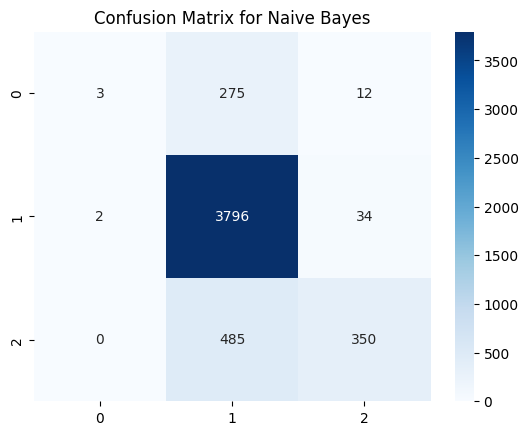

Accuracy of Naive Bayes: 0.8370

Training k-Nearest Neighbors...
Classification Report for k-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.44      0.07      0.11       290
           1       0.91      0.28      0.42      3832
           2       0.21      0.93      0.34       835

    accuracy                           0.37      4957
   macro avg       0.52      0.42      0.29      4957
weighted avg       0.76      0.37      0.39      4957

Confusion Matrix for k-Nearest Neighbors:


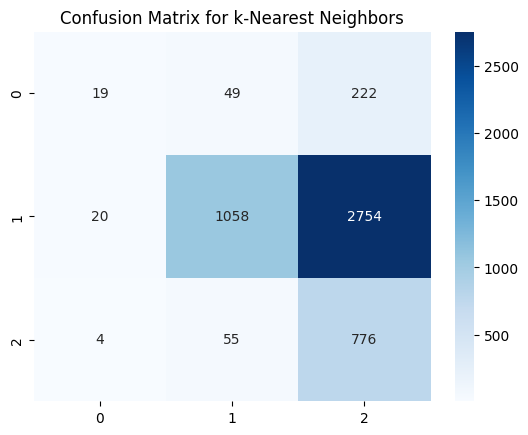

Accuracy of k-Nearest Neighbors: 0.3738

Training Logistic Regression...
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.52      0.16      0.24       290
           1       0.91      0.96      0.94      3832
           2       0.83      0.82      0.83       835

    accuracy                           0.89      4957
   macro avg       0.75      0.65      0.67      4957
weighted avg       0.88      0.89      0.88      4957

Confusion Matrix for Logistic Regression:


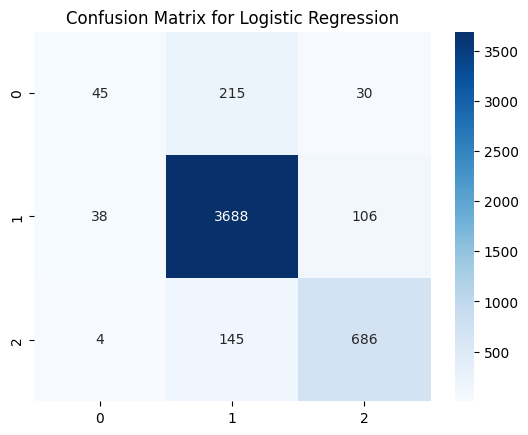

Accuracy of Logistic Regression: 0.8915



In [ ]:
# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))

    print(f"Confusion Matrix for {name}:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy:.4f}\n")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Embedding, LSTM

In [ ]:
# CNN Model
cnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=X.shape[1]),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Predict class probabilities
cnn_y_pred_prob = cnn_model.predict(X_test)

# Convert probabilities to class labels
cnn_y_pred = np.argmax(cnn_y_pred_prob, axis=1)

# Print the classification report
print("CNN Classification Report:")
print(classification_report(y_test, cnn_y_pred))


Epoch 1/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.7326 - loss: 1.2768 - val_accuracy: 0.7730 - val_loss: 0.6721
Epoch 2/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7059 - loss: 4.9560 - val_accuracy: 0.7730 - val_loss: 0.6730
Epoch 3/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7744 - loss: 0.6671 - val_accuracy: 0.7730 - val_loss: 0.6653
Epoch 4/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7781 - loss: 0.6596 - val_accuracy: 0.7730 - val_loss: 0.6651
Epoch 5/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7745 - loss: 0.6629 - val_accuracy: 0.7730 - val_loss: 0.6652
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
CNN Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       290
           1       0.77      1.00      0.87      3832
           2       0.00      0.00      0.00       835

    accuracy                           0.77      4957
   macro avg       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Store results
results = {}

# Evaluate each model and store the results
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Compute ROC AUC score using predict_proba for all models
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    else:
        roc_auc = "N/A"  # ROC AUC cannot be calculated for this model

    results[name] = {
        "Accuracy": accuracy,
        "ROC AUC": roc_auc
    }

In [ ]:
from sklearn.metrics import roc_auc_score

# For CNN, we already have y_pred and y_pred_proba
cnn_y_pred_prob = cnn_model.predict(X_test)
cnn_y_pred = np.argmax(cnn_y_pred_prob, axis=1)

# Calculate ROC AUC for CNN
cnn_roc_auc = roc_auc_score(y_test, cnn_y_pred_prob, multi_class='ovr')
cnn_accuracy = accuracy_score(y_test, cnn_y_pred)

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# Add CNN results
results["CNN"] = {
    "Accuracy": cnn_accuracy,
    "ROC AUC": cnn_roc_auc
}

                     Accuracy   ROC AUC
Random Forest        0.894089  0.921339
Naive Bayes          0.836998  0.873791
k-Nearest Neighbors  0.373815  0.638283
Logistic Regression  0.891467  0.923521
CNN                  0.773048  0.500000


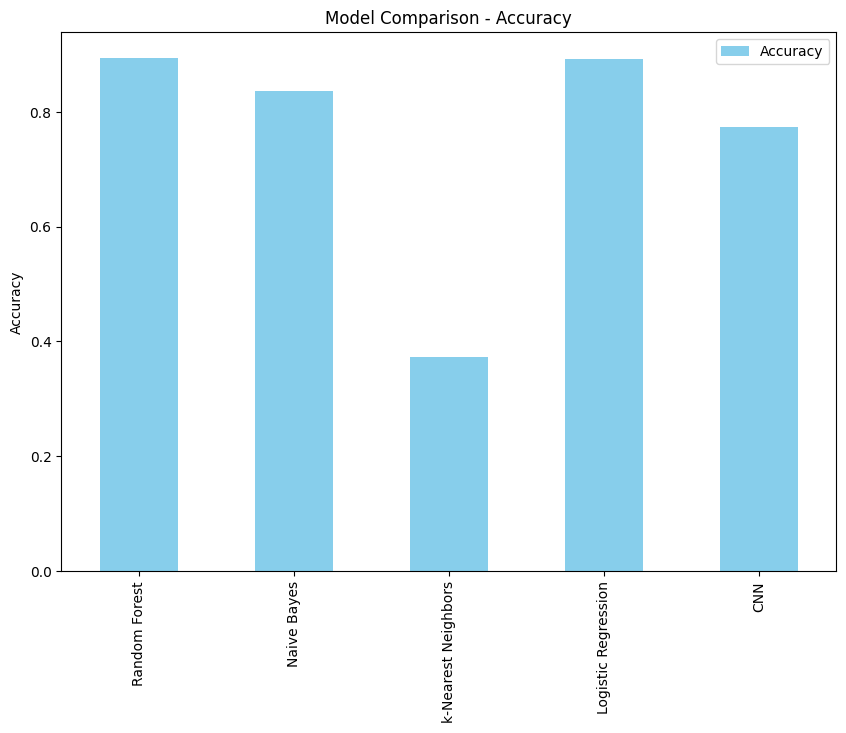

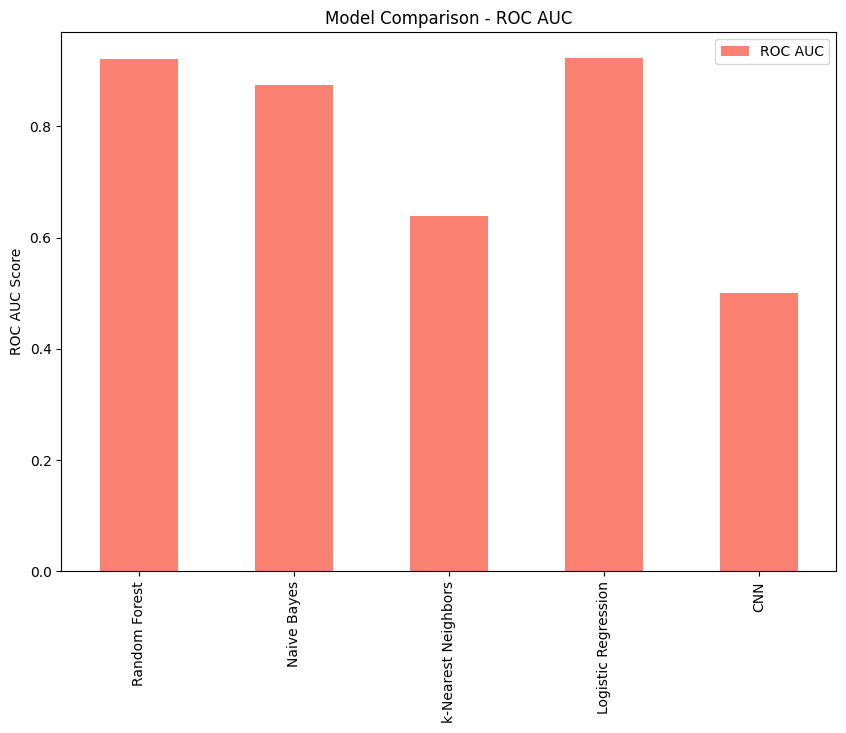

In [ ]:
# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Plot the comparison
results_df[["Accuracy"]].plot(kind="bar", figsize=(10, 7), color='skyblue')
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy")
plt.show()

# Plot the ROC AUC scores if available
if "ROC AUC" in results_df.columns:
    results_df[["ROC AUC"]].plot(kind="bar", figsize=(10, 7), color='salmon')
    plt.title("Model Comparison - ROC AUC")
    plt.ylabel("ROC AUC Score")
    plt.show()

In [ ]:
import joblib

# Since RandomForest is the best model
best_model = models["Random Forest"]

# Save the model to a file
joblib.dump(best_model, 'best_model.pkl')

# Download the model to your local machine
from google.colab import files
files.download('best_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Assuming tfidf is your TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Download the vectorizer to your local machine
files.download('tfidf_vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>